In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
import datetime

In [2]:
date_today = pd.to_datetime(datetime.datetime.now().strftime('%Y-%m-%d'), format='%Y-%m-%d')

In [3]:
main_df = pd.read_csv('./prepped_data/메인_데이터_20060101_20210416_ver_1.csv')
print(main_df.shape)
main_df.head()

(2054842, 11)


,지번주소,도로명,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,건물연식,부동산유형
0,서울특별시 강남구 개포동 1264-3,개포로31길 23-7,(1264-3),53.28,11500,-1,1992.0,14.0,2006-08-29,29.0,연립다세대
1,서울특별시 강남구 개포동 171-13,선릉로14길 11,(171-13),68.08,56500,2,1988.0,18.0,2006-12-20,33.0,연립다세대
2,서울특별시 강남구 개포동 1239-7,개포로15길 25,강남빌라 가동,52.59,40500,2,1988.0,18.0,2006-12-09,33.0,연립다세대
3,서울특별시 강남구 개포동 1239-7,개포로15길 25,강남빌라 가동,52.59,42000,1,1988.0,18.0,2006-12-19,33.0,연립다세대
4,서울특별시 강남구 개포동 1239-6,개포로15길 27,강남빌라 나동,52.75,22000,2,1988.0,18.0,2006-11-02,33.0,연립다세대


<AxesSubplot:>

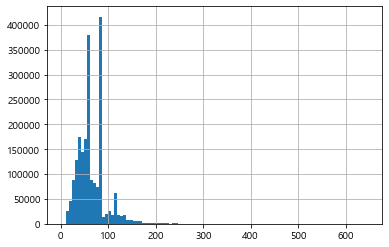

In [4]:
main_df['전용면적(㎡)'].hist(bins=100)

In [5]:
def house_area_into_classes(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        for i in range(100):
            if x <= ((i+1)*5):
                return '{}~{}'.format((i*5), (i+1)*5)
        return '500초과'

In [7]:
main_df['전용면적_classes'] = main_df['전용면적(㎡)'].apply(house_area_into_classes)

In [8]:
main_df['가격_면적'] = main_df['거래금액(만원)'] / main_df['전용면적(㎡)']

<AxesSubplot:>

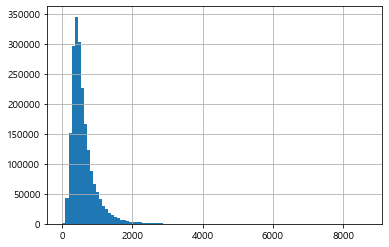

In [9]:
main_df['가격_면적'].hist(bins=100)

In [11]:
upper_df = main_df[main_df['가격_면적'] > 3000]
print(upper_df.shape)

(2416, 13)


<AxesSubplot:>

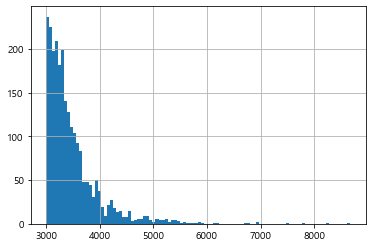

In [12]:
upper_df['가격_면적'].hist(bins=100)

In [14]:
main_df = main_df[main_df['가격_면적'] <= 3750]
print(main_df.shape)
main_df.head()

(2054386, 13)


,지번주소,도로명,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,건물연식,부동산유형,전용면적_classes,가격_면적
0,서울특별시 강남구 개포동 1264-3,개포로31길 23-7,(1264-3),53.28,11500,-1,1992.0,14.0,2006-08-29,29.0,연립다세대,50~55,215.840841
1,서울특별시 강남구 개포동 171-13,선릉로14길 11,(171-13),68.08,56500,2,1988.0,18.0,2006-12-20,33.0,연립다세대,65~70,829.905993
2,서울특별시 강남구 개포동 1239-7,개포로15길 25,강남빌라 가동,52.59,40500,2,1988.0,18.0,2006-12-09,33.0,연립다세대,50~55,770.108386
3,서울특별시 강남구 개포동 1239-7,개포로15길 25,강남빌라 가동,52.59,42000,1,1988.0,18.0,2006-12-19,33.0,연립다세대,50~55,798.630918
4,서울특별시 강남구 개포동 1239-6,개포로15길 27,강남빌라 나동,52.75,22000,2,1988.0,18.0,2006-11-02,33.0,연립다세대,50~55,417.061611


<AxesSubplot:>

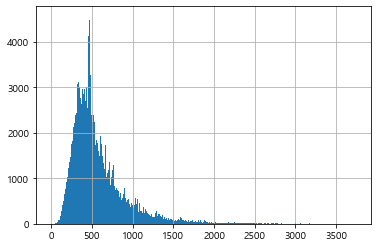

In [20]:
main_df['가격_면적'].hist(bins=5000)

In [21]:
lower_df = main_df[main_df['가격_면적'] < 100]

<AxesSubplot:>

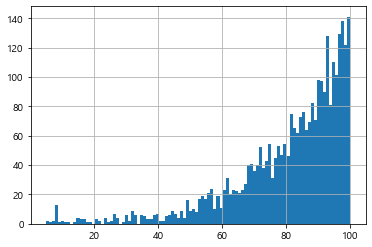

In [22]:
lower_df['가격_면적'].hist(bins=100)

In [23]:
main_df = main_df[main_df['가격_면적'] >= 40]

In [24]:
def price_over_area_feature_engi(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        for i in range(1000):
            if x < ((i+1)*10):
                return '{}~{}'.format((i*10), (i+1)*10)
        
        return '10000초과'

In [25]:
main_df['가격_면적_classes'] = main_df['가격_면적'].apply(price_over_area_feature_engi)

In [26]:
main_df['가격_면적_classes'].nunique()

371

In [27]:
main_df['가격_면적_classes'].value_counts()

410~420      41982
400~410      41574
380~390      40567
350~360      40108
370~380      39994
430~440      39135
360~370      38792
340~350      38471
420~430      38358
330~340      37938
390~400      37908
440~450      37796
450~460      37250
320~330      37018
470~480      36858
500~510      36349
310~320      36078
300~310      35946
460~470      35705
480~490      34601
290~300      32561
490~500      32510
510~520      31977
520~530      30781
280~290      30753
530~540      29421
270~280      27921
550~560      27604
580~590      27538
540~550      27397
560~570      26320
260~270      26122
570~580      24087
600~610      23965
250~260      23779
610~620      22667
240~250      21823
590~600      21740
620~630      21528
700~710      21518
630~640      20719
640~650      19880
650~660      19309
230~240      19270
660~670      17829
680~690      17230
220~230      17212
670~680      16924
210~220      16408
690~700      15846
200~210      14480
710~720      14131
740~750     

In [28]:
%%time
main_df.to_csv('./prepped_data/메인_데이터_20060101_20210416_ver_2.csv', index=False)

Wall time: 8.75 s
